# Machine Learning for Classification

We'll use logistic regression to predict churn

# 3.1 Churn prediction project

The project is about two companies of telecomunications and we will try to predict which costumer is thinking to leave from company, who are going to churn.

- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

# 3.2 Data Preparation

- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [5]:
!wget $data -O data-week-3.csv 

--2023-01-28 14:06:24--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.007s  

2023-01-28 14:06:24 (141 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [6]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.head(2).T

,0,1
customerID,7590-VHVEG,5575-GNVDE
gender,Female,Male
SeniorCitizen,0,0
Partner,Yes,No
Dependents,No,No
tenure,1,34
PhoneService,No,Yes
MultipleLines,No phone service,No
InternetService,DSL,DSL
OnlineSecurity,No,Yes


In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ','_')

In [9]:
df.head(3).T

,0,1,2
customerid,7590-vhveg,5575-gnvde,3668-qpybk
gender,female,male,male
seniorcitizen,0,0,0
partner,yes,no,no
dependents,no,no,no
tenure,1,34,2
phoneservice,no,yes,yes
multiplelines,no_phone_service,no,no
internetservice,dsl,dsl,dsl
onlinesecurity,no,yes,yes


In [10]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

- `seniorcitizen` = 1 or 0
- `totalcharges` = should be number

In [11]:
# convert totalcharges data type to be numeric

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [12]:
df.totalcharges = df.totalcharges.fillna(0)

In [13]:
# convert 
df.churn = (df.churn == 'yes').astype(int)

# 3.3 Setting up the validation framework

- Perform the train/validation/test split with Scikit-Learn

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [16]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [18]:
# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [20]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.4 EDA

- Check missing values
- Look at the target variable `y` (churn)
- Look at numerical and categorical variables

In [21]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train 

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [22]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [23]:
# the data distribution of churn variable
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [24]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [25]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

0.26996805111821087

means : 20% our consumers churn

### Numerical variables

tenure, monthlycharges, totalcharges

In [26]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

### Categorical variables

In [27]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [28]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [29]:
df_full_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
1,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
2,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
3,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
4,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5630,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5631,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
5632,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


In [30]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [31]:
for i in categorical:
  print(i)
  print(df_full_train[i].unique())
  print()

gender
['male' 'female']

seniorcitizen
[0 1]

partner
['yes' 'no']

dependents
['yes' 'no']

phoneservice
['yes' 'no']

multiplelines
['no' 'yes' 'no_phone_service']

internetservice
['no' 'dsl' 'fiber_optic']

onlinesecurity
['no_internet_service' 'yes' 'no']

onlinebackup
['no_internet_service' 'yes' 'no']

deviceprotection
['no_internet_service' 'yes' 'no']

techsupport
['no_internet_service' 'yes' 'no']

streamingtv
['no_internet_service' 'no' 'yes']

streamingmovies
['no_internet_service' 'yes' 'no']

contract
['two_year' 'one_year' 'month-to-month']

paperlessbilling
['no' 'yes']

paymentmethod
['mailed_check' 'credit_card_(automatic)' 'bank_transfer_(automatic)'
 'electronic_check']



#3.5 Feature Importance: Churn Rate and Risk Ratio

Feature importance analysis - identifying which features affect our target variable
- Churn rate
- Risk ratio : a way to measure the importance of different categorical variables
- Mutual information - later

## Churn Rate

we can look the churn rate from the specific group

In [32]:
# subgroup gender = male
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
# subgroup gender = female
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
# global churn
global_churn = df_full_train.churn.mean()

print(f'churn_male is {churn_male}')
print(f'churn_female is {churn_female}')
print(f'global_churn is {global_churn}')

churn_male is 0.2632135306553911
churn_female is 0.27682403433476394
global_churn is 0.26996805111821087


In [33]:
# different between churn male and churn global
different_global_male = global_churn - churn_male
# different between churn female and churn global
different_global_female = global_churn - churn_female


print(f'different_global_male is {different_global_male}')
print(f'different_global_female is {different_global_female}')

different_global_male is 0.006754520462819769
different_global_female is -0.006855983216553063


---
male and female churns are not so different to global

In [34]:
# subgroup partner = yes
churn_with_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
# subgroup partner = no
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
print(f'churn_with_partner is {churn_with_partner}')
print(f'churn_no_partner is {churn_no_partner}')

churn_with_partner is 0.20503330866025166
churn_no_partner is 0.3298090040927694


In [35]:
# different between churn with partner and churn global
different_global_with_partner = global_churn - churn_with_partner
# different between churn no partner and churn global
different_global_no_partner = global_churn - churn_no_partner

print(f'different_global_with_partner is {different_global_with_partner}')
print(f'different_global_no_partner is {different_global_no_partner}')

different_global_with_partner is 0.06493474245795922
different_global_no_partner is -0.05984095297455855


---
Here we find a considerable difference, this could tell us that the feature partner is more important for prediction

- If global_churn-churn'group' is > 0, that means that this 'group' **is less likely to churn** and 
- If global_churn-churn'group' is < 0, that means that this 'group' is **more likely to churn**

Summary : the partner variable is more important than the gender variable to predict churn 

## Risk Ratio

$Risk\_ratio=\frac{group\_churn}{global\_churn}$

In [36]:
churn_no_partner / global_churn # 22% higher

1.2216593879412643

In [37]:
churn_with_partner / global_churn # 24% lower

0.7594724924338315

---
In this case if risk ratio > 1 is **more likely to churn** 

and if risk ratio < 1 is **less likely to churn**

In [38]:
churn_male / global_churn

0.9749802969838747

In [39]:
churn_female / global_churn

1.0253955354648652

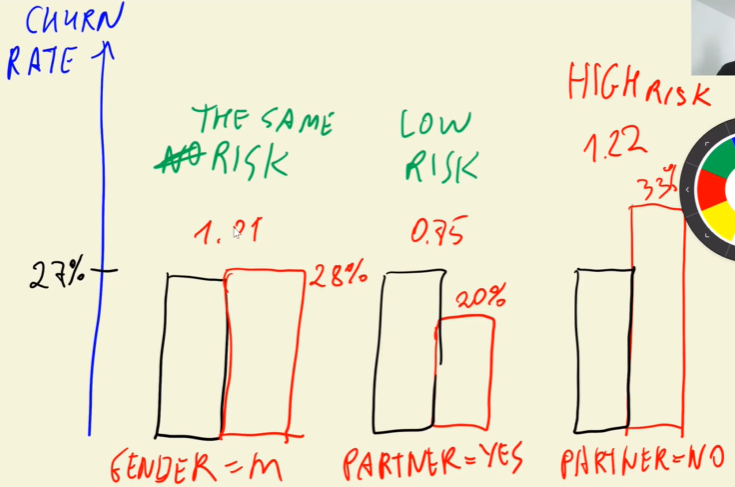

This is the secuence like sql that we going to implement
```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

to display all the DataFrame from the loop, we need to use the function 'display' from IPython library

In [40]:
from IPython.display import display

In [41]:
for c in categorical:
  print(c)
  df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
  df_group['diff'] = df_group['mean'] - global_churn
  df_group['risk'] = df_group['mean'] / global_churn
  display(df_group)
  print()
  print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### example interpretation 

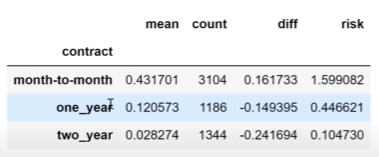

in subgroup `contract`, people who are month-to-month contract, they are more likely to churn than people who have two year contract.

It tells us that probably contract variable is important, but we have no way of saying that contract is perhaps more important than other variables.

# 3.6 Feature Importance: Mutual Information

Mutual information - concept from information theory, it tells us how much we can learn about one variable, if we know the value of another

- wikipedia: In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables.

A way to measure the importance of categorical variables. It can tell us how important each variable.

In [42]:
from sklearn.metrics import mutual_info_score
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

It tells us, how much do we learn about churn by observing the value of `contract` variable.

In [43]:
def mutual_info_churn_score(series):
  return mutual_info_score(series, df_full_train.churn)

In [44]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

Insight:
- variable `contract` is the most important variable
- variable `gender` is the least important variable

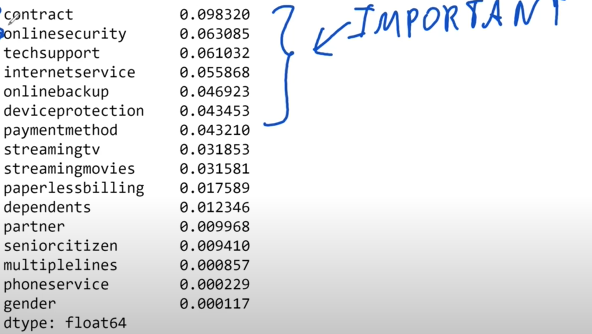

# 3.7 Feature Importance: Correlation

**Correlation**: A way to measure feature importance for numerical variables.

Correlation coefficient (Pearson Correlation)

* A way to measure dependency between two variables.
* From [Wikipedia-es](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson)

    Pearson correlation coefficient is a measure of linear dependence between two quantitative random variables. Unlike the covariance, the Pearson correlation is independent of the measurement scale of the variables.

    In a less formal way, we can define Pearson's correlation coefficient as an index that can be used to measure the degree of relationship of two variables as long as they are both quantitative and continuous.

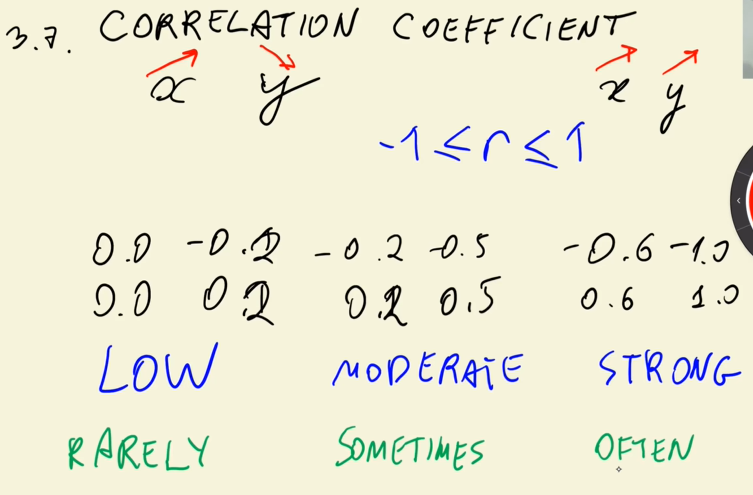

In [45]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

### Tenure

The churn rate of the people who stay at the company less than 2 months.

In [46]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

Interpretation: if somebody stayed in the company, 0 - 2 month, the churn rate is pretty high (59.53%)

The churn rate of the people who stay at the company  between two and 12 months. 

In [47]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

The churn rate of the people who stay at the company more than 12 months.

In [48]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

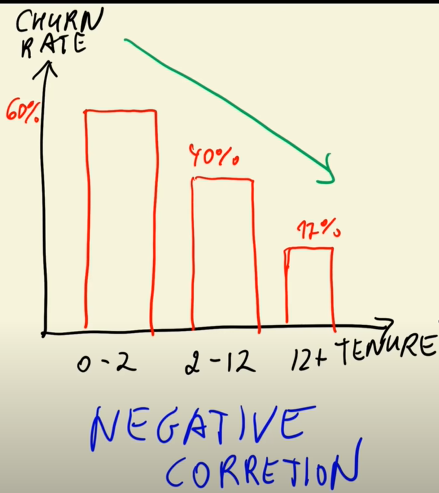

### Monthly Charges

In [49]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [50]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [51]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

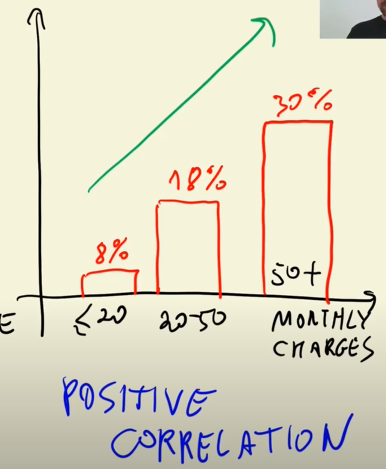

#3.8 One Hot Encoding

- Use Scikit-Learn to encode categorical features.

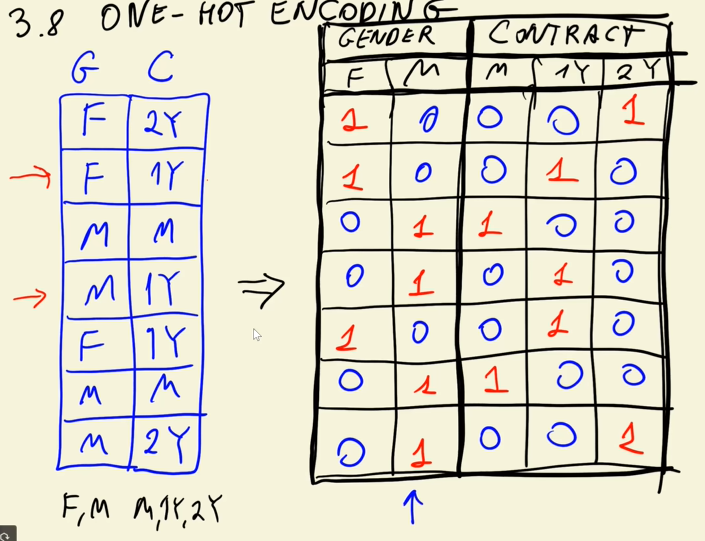

In [52]:
from sklearn.feature_extraction import DictVectorizer

In [74]:
df_train[['gender','contract','tenure']].iloc[:100].to_dict(orient='records')

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 17},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 66},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 2},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to

In [75]:
dicts = df_train[['gender','contract','tenure']].iloc[:100].to_dict(orient='records')

In [76]:
dv = DictVectorizer(sparse=False)

In [77]:
dv.fit(dicts)

DictVectorizer(sparse=False)

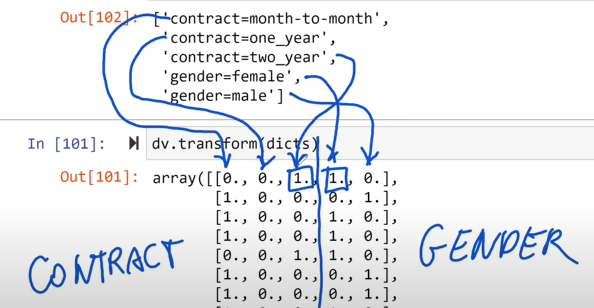

In [78]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'tenure']

In [79]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

### Make for train data

In [80]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [81]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [82]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [83]:
dv.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [84]:
X_train = dv.fit_transform(train_dicts)

In [85]:
X_train.shape

(4225, 45)

### Make for Valid Data

In [86]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [87]:
X_val = dv.transform(val_dicts)

In [88]:
X_val.shape

(1409, 45)

#3.9 Logistic Regression

- Binary classification
- Linear vs logistic regression

Sigmoid:

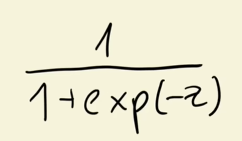

In [90]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [91]:
z = np.linspace(-5, 5, 51)

In [94]:
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [92]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

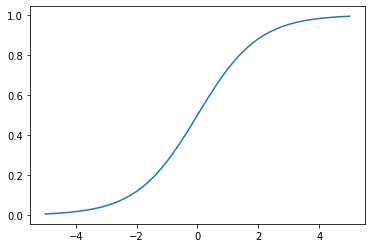

In [93]:
plt.plot(z, sigmoid(z))

In [95]:
def linear_regression(xi):
  result = w0

  for j in range(len(w)):
    result = result + xi[j] * w[j]
  
  return result

In [96]:
def logistic_regression(xi):
  score = w0

  for j in range(len(w)):
    score = score + xi[j] * w[j]
  
  result = sigmoid(score)
  return result

# 3.10 Training Logistic Regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [100]:
model.intercept_[0]

-0.10903461122975763

In [101]:
# the weights
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [103]:
model.predict_proba(X_train)

array([[0.90451531, 0.09548469],
       [0.32067017, 0.67932983],
       [0.36632206, 0.63367794],
       ...,
       [0.46838428, 0.53161572],
       [0.95746004, 0.04253996],
       [0.30127008, 0.69872992]])

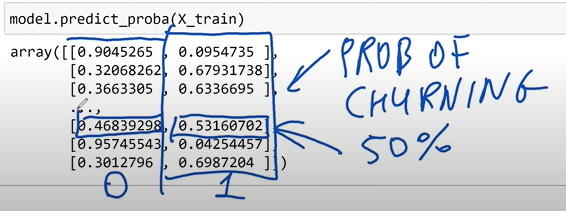

In [104]:
y_pred = model.predict_proba(X_train)[:, 1]

In [106]:
y_pred_val = model.predict_proba(X_val)[:, 1]
y_pred_val

array([0.00899598, 0.20452238, 0.21222245, ..., 0.13638428, 0.79976953,
       0.83740736])

In [109]:
churn_decision = (y_pred_val >= 0.5)
churn_decision 

array([False, False, False, ..., False,  True,  True])

In [110]:
# The people who must be receive a promotional/ discount e-mail
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

## Model Evaluation

In [113]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [114]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [115]:
(y_val == churn_decision).mean()

0.8034066713981547

In [117]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred_val
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [118]:
df_pred

,probability,prediction,actual
0,0.008996,0,0
1,0.204522,0,0
2,0.212222,0,0
3,0.543045,1,1
4,0.213785,0,0
...,...,...,...
1404,0.313661,0,0
1405,0.039356,0,1
1406,0.136384,0,0
1407,0.799770,1,1


In [119]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [120]:
df_pred

,probability,prediction,actual,correct
0,0.008996,0,0,True
1,0.204522,0,0,True
2,0.212222,0,0,True
3,0.543045,1,1,True
4,0.213785,0,0,True
...,...,...,...,...
1404,0.313661,0,0,True
1405,0.039356,0,1,False
1406,0.136384,0,0,True
1407,0.799770,1,1,True


In [121]:
df_pred.correct.astype('int').mean()

0.8034066713981547

#3.11 Model Interpretation

In [123]:
dv.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [122]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

if we join dv.get_feature_names() and model.coef_[0].round(3), we got the weights of each feature..

In [124]:
a = [1, 2, 3, 4]
b = 'abcd'

In [127]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [128]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [129]:
small = ['contract', 'tenure', 'monthlycharges']

In [132]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [135]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [136]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [138]:
dv_small.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [139]:
X_train_small = dv_small.transform(dicts_train_small)

In [148]:
X_train_small.shape

(4225, 5)

In [140]:
 model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [142]:
# bias term
w0  = model_small.intercept_[0]
w0

-2.4767756639857703

In [144]:
w = model_small.coef_[0]
w

array([ 0.97004492, -0.0251365 , -0.94872201,  0.02748236, -0.03618424])

In [145]:
dict(zip(dv_small.get_feature_names(), model_small.coef_[0]))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97004491771899,
 'contract=one_year': -0.025136503673873437,
 'contract=two_year': -0.9487220134199665,
 'monthlycharges': 0.02748236433414424,
 'tenure': -0.03618424328985913}

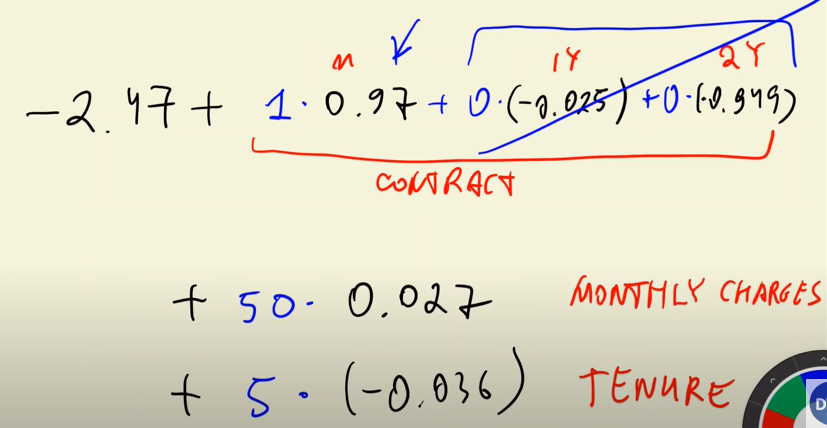

In [149]:
sigmoid(-2.47 + 0.97 + (50 * 0.027) +  (5 * (-0.036)))

0.41824062315816374

The probability of churning for this customer is 42%

# 3.12 Using the Model

In [150]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [152]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [154]:
y_full_train = df_full_train.churn.values

In [155]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [156]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [158]:
X_test = dv.transform(dicts_test)

In [160]:
y_pred = model.predict_proba(X_test)[:, 1]

In [161]:
churn_decision = (y_pred >= 0.5)

In [162]:
(churn_decision == y_test).mean()

0.815471965933286

In [170]:
dicts_test[-1]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [172]:
customer = dicts_test[-1]

In [173]:
X_customer = dv.transform([customer])

In [174]:
model.predict_proba(X_customer)[0, 1]

0.5968852088243827

The customer has only 59% probability of churning. We will send her a promotionl e-mail.

In [176]:
y_test[-1]

1

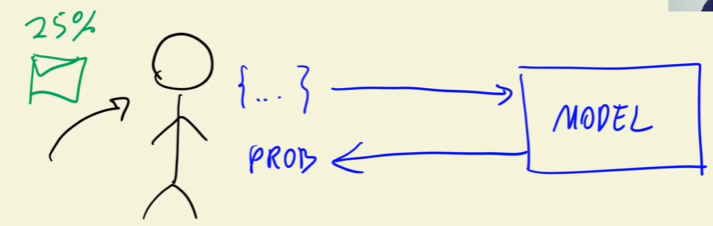

# 3.13 Summary


- Feature importance : risk, mutual information, correlation

- One-hot encoding : can be implemented with `DictVectorizer`.

- Logistic Regression : linear model like linear regression

- Output of logistic regression : probability

- Interpretation of weights is similar to linear regression.